In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

In [65]:
df_census = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/us-census-data-transformed.csv')

df_fbi = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/gun_data_clean.csv')

In [57]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   State                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     float64
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     float64
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 4   Population, Census, April 1, 2010                                                       50 non-null     float64
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [66]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   month-name                 12485 non-null  object 
 2   year                       12485 non-null  int64  
 3   state                      12485 non-null  object 
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   private_sale_handgun       2750 non-null   float64
 9   private_sale_long_gun      2750 non-null   float64
 10  private_sale_other         2750 non-null   float64
 11  return_to_seller_handgun   2475 non-null   float64
 12  return_to_seller_long_gun  2750 non-null   float64
 13  return_to_seller_other     2255 non-null   flo

In [67]:
df_fbi.head()

,month,month-name,year,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,2017-09-01,September,2017,Alabama,5734.0,6320.0,221.0,317,9.0,16.0,3.0,0.0,0.0,3.0,12623.0
1,2017-09-01,September,2017,Alaska,2320.0,2930.0,219.0,160,17.0,24.0,1.0,0.0,0.0,0.0,5671.0
2,2017-09-01,September,2017,Arizona,11063.0,7946.0,920.0,631,38.0,12.0,2.0,0.0,0.0,0.0,20612.0
3,2017-09-01,September,2017,Arkansas,4347.0,6063.0,165.0,366,13.0,23.0,0.0,0.0,2.0,1.0,10980.0
4,2017-09-01,September,2017,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,0.0,0.0,64730.0


I want to begin my analysis by visualizing the following:
1. Population growth by state from 2010 'Population, Cesnus, April 1, 2010' to 2016 'Population estimates, July 1, 2016,  (V2016)' using bar charts for each year for each state.
2. The distribution of race or ethnicity for each state. Use the following columns:
 14  Black or African American alone, percent, July 1, 2016,  (V2016),
 15  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
 16  Asian alone, percent, July 1, 2016,  (V2016)
 17  Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
 18  Two or More Races, percent, July 1, 2016,  (V2016)
 19  Hispanic or Latino, percent, July 1, 2016,  (V2016)
 20  White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016) 
3. Persons living in poverty in each state.
4. Total permits for each state adjusting for the population.

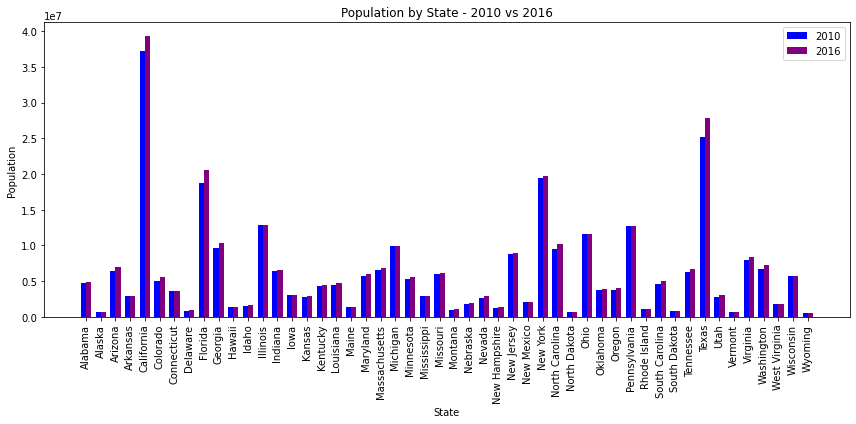

In [12]:
# population growth from 2010 to 2016

years = ['2010', '2016']
population_2010 = df_census['Population, Census, April 1, 2010'].values
population_2016 = df_census['Population estimates, July 1, 2016,  (V2016)'].values
states = df_census['State'].values

bar_width = 0.35

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(states))

ax.bar(index, population_2010, bar_width, label='2010', color='blue')
ax.bar(index + bar_width, population_2016, bar_width, label='2016', color='purple')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Population')
ax.set_title('Population by State - 2010 vs 2016')
ax.legend()

plt.tight_layout()
plt.show()

In [26]:
# Prepare data for visualization
df_census = df_census.rename(columns = {'Black or African American alone, percent, July 1, 2016,  (V2016)':'Black',
                          'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)':'American Indian',
                          'Asian alone, percent, July 1, 2016,  (V2016)':'Asian',
                          'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)':'Native Hawaiian',
                          'Two or More Races, percent, July 1, 2016,  (V2016)':'Two or More Races',
                          'Hispanic or Latino, percent, July 1, 2016,  (V2016)':'Hispanic',
                          'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)':'White'})

race_columns = ['Black', 'American Indian', 'Native Hawaiian', 'Hispanic', 'White', 'Two or More Races']
race_by_state = df_census.groupby('State')[race_columns].sum()

race_by_state.head()

,Black,American Indian,Native Hawaiian,Hispanic,White,Two or More Races
State,,,,,,
Alabama,0.268,0.007,0.001,0.042,0.658,0.016
Alaska,0.038,0.152,0.013,0.070,0.612,0.073
Arizona,0.049,0.054,0.003,0.309,0.555,0.028
Arkansas,0.157,0.010,0.003,0.073,0.729,0.020
California,0.065,0.017,0.005,0.389,0.377,0.038


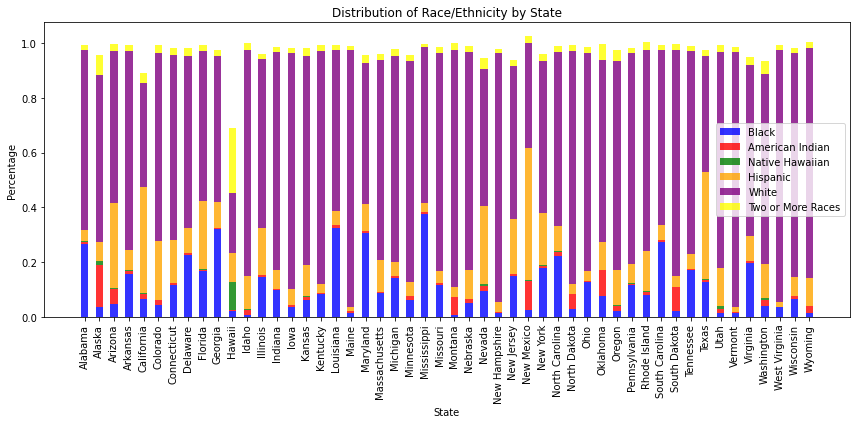

In [29]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(race_by_state))

bar_width = 0.5
opacity = 0.8

colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow']

bottom = np.zeros(len(race_by_state))

for i, race in enumerate(race_columns):
    ax.bar(index, race_by_state[race], bar_width, alpha=opacity, label=race, color=colors[i], bottom=bottom)
    bottom += race_by_state[race]

ax.set_xticks(index)
ax.set_xticklabels(race_by_state.index, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Race/Ethnicity by State')
ax.legend()

plt.tight_layout()
plt.show()

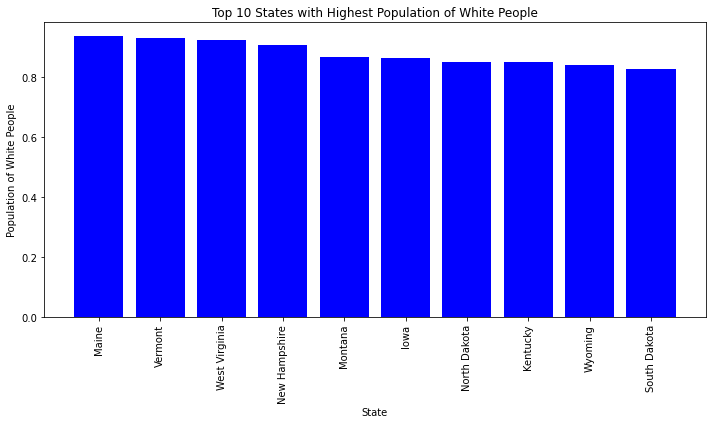

In [43]:
top_whitepop_states = df_census.sort_values('White', ascending=False).head(10)

values = top_whitepop_states['White'] = top_whitepop_states['White'] *100

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(top_whitepop_states['State'], top_white_states['White'], color='blue')

ax.set_xlabel('State')
ax.set_ylabel('Population of White People')
ax.set_title('Top 10 States with Highest Population of White People')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/27/4_5g51f52md6gp9fl962vtbc0000gn/T/ipykernel_59721/2080632453.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(states, rotation=90)


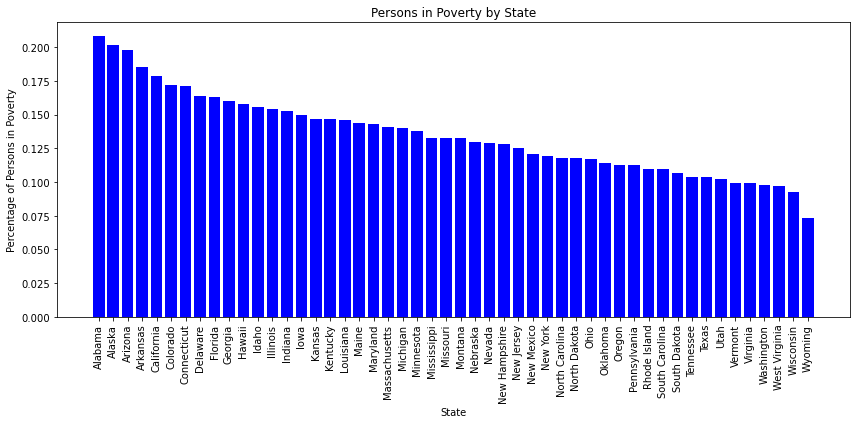

In [49]:
# Prepare data for visualization
poverty_data = df_census['Persons in poverty, percent'].sort_values(ascending=False).values

# Create bar chart for each state
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(states, poverty_data, color='blue')
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Percentage of Persons in Poverty')
ax.set_title('Persons in Poverty by State')
plt.tight_layout()
plt.show()

In [50]:
# Prepare data for visualization
total_permits = df_fbi['total_permits'].values

# Adjust permits by population
adjusted_permits = total_permits / population_2016

# Create bar chart for each state
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(states, adjusted_permits, color='blue')
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Permits per Capita')
ax.set_title('Total Permits Adjusted for Population by State')
plt.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (12485,) (50,) 